In [19]:
# import from the scientific stack
from pyspots.data import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# and import from the pyspots library
from pyspots.fit import init_default_avrami_model, avrami_func, do_fit
from pyspots.vis import plot_fit_against_full_dataset


In [46]:
# grab the toy dataset
spot_growth = data.spots90FQ2_normalized_spot
df = pd.DataFrame({spot.idx: spot.data for spot in spot_growth}, index=spot_growth[0].times)
# compute the rolling mean

In [47]:
window_size=3
averaged = pd.rolling_mean(df, window=window_size)[window_size-1:]

In [48]:
# compute the average min/max
avg_min = averaged.head(5).mean()
avg_max = averaged.tail(5).mean()

In [49]:
normalized = (averaged - avg_min) / (avg_max - avg_min)

In [51]:
fit = {}
print('0 ')
for idx, col_name in enumerate(normalized):
    if idx % 20 == 0:
        print('*',end='', sep='')
    col = normalized[col_name]
    times = col.index
    data = col.values
    fits = do_fit(times, data)
    fit[col_name] = fits

0 
*********************************************

In [59]:
params = {}
for spot_idx, f in fit.items():
    dct = {'iterations': len(f)}
    dct.update(f[-1].best_values)
    params[spot_idx] = dct
# params = {spot_idx: f[-1].best_values.update({'iterations': len(f)}) for spot_idx, f in fit.items()}

In [60]:
param_data = pd.DataFrame(params).T

<IPython.core.display.Javascript object>


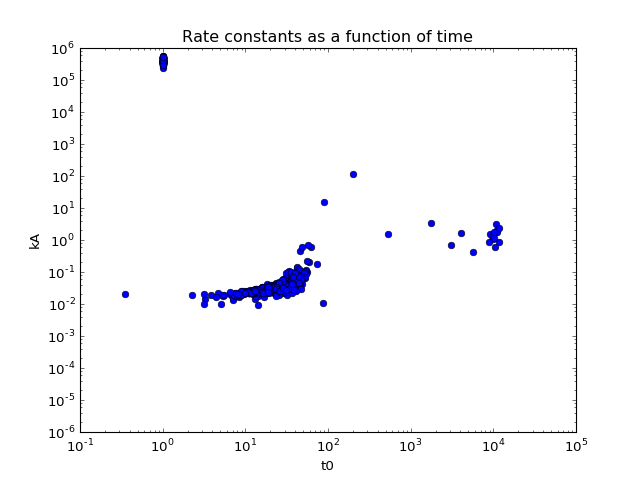

In [61]:
fig, ax = plt.subplots()
ax.loglog(param_data.t0, param_data.kA, 'o')
ax.set_xlabel('t0')
ax.set_ylabel('kA')
ax.set_title('Rate constants as a function of time')